In [39]:
import pandas as pd
import numpy as np
import pickle
import time
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.metrics import make_scorer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from xgboost import XGBRegressor
from xgboost import plot_importance
import xgboost as xgb
import matplotlib.pyplot as plt
import sys
import gc
import seaborn as sns

In [65]:
def save_pkl(file_dir, data):
    f = open(file_dir,"wb")
    pickle.dump(data, f, protocol=4)
    f.close()
    
def read_pkl(file_dir):
    f = open(file_dir,"rb")
    data = pickle.load(f)
    return data

def mape_error(y_true, y_pred):
    return -np.sqrt(np.sum((y_pred - y_true) * (y_pred - y_true)) * 1.0 / y_true.shape[0])

def scoring(reg, x, y):
    pred = reg.predict(x)
    return smape(pred, y)

def smape(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) / (y_true + y_pred) * 2)

def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

def model_performance_sc_plot(predictions, labels, title):
    # Get min and max values of the predictions and labels.
    min_val = max(max(predictions), max(labels))
    max_val = min(min(predictions), min(labels))
    # Create dataframe with predicitons and labels.
    performance_df = pd.DataFrame({"Label":labels})
    performance_df["Prediction"] = predictions
    # Plot data
    sns.jointplot(y="Label", x="Prediction", data=performance_df, kind="reg")
    plt.plot([min_val, max_val], [min_val, max_val],'m--')
    plt.title(title, fontsize=9)
    plt.show()

In [12]:
# load the whole size dataset
X = np.load("London/X_test.npy")
Y_NO2 = np.load("London/Y_NO2_test.npy")
Y_PM10 = np.load("London/Y_PM10_test.npy")
Y_PM25 = np.load("London/Y_PM25_test.npy")

# PM25

In [29]:
# split the Y_PM25, X into training part and testing part
train_X_PM25, test_X_PM25, train_Y_PM25, test_Y_PM25 = train_test_split(X, Y_PM25, test_size=0.2, random_state=11)
print(train_X_PM25.shape, test_X_PM25.shape, train_Y_PM25.shape, test_Y_PM25.shape)

(202675, 125) (50669, 125) (202675,) (50669,)


In [31]:
#XGBoost
ts = time.time()

model = XGBRegressor(
    max_depth=8,
    n_estimators=1000,
    min_child_weight=300, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.3,    
    seed=42)

model.fit(
    train_X_PM25, 
    train_Y_PM25, 
    eval_metric="rmse", 
    eval_set=[(train_X_PM25, train_Y_PM25), (test_X_PM25, test_Y_PM25)], 
    verbose=True, 
    early_stopping_rounds = 10)

pred = model.predict(test_X_PM25)
print (smape(pred, test_Y_PM25))
time.time() - ts

[0]	validation_0-rmse:12.9637	validation_1-rmse:12.9463
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:11.9464	validation_1-rmse:11.933
[2]	validation_0-rmse:11.0518	validation_1-rmse:11.0424
[3]	validation_0-rmse:10.27	validation_1-rmse:10.2649
[4]	validation_0-rmse:9.58781	validation_1-rmse:9.58676
[5]	validation_0-rmse:8.99758	validation_1-rmse:9.00101
[6]	validation_0-rmse:8.4891	validation_1-rmse:8.49707
[7]	validation_0-rmse:8.05099	validation_1-rmse:8.06333
[8]	validation_0-rmse:7.67848	validation_1-rmse:7.6947
[9]	validation_0-rmse:7.35829	validation_1-rmse:7.37803
[10]	validation_0-rmse:7.08906	validation_1-rmse:7.11304
[11]	validation_0-rmse:6.85472	validation_1-rmse:6.88321
[12]	validation_0-rmse:6.6654	validation_1-rmse:6.69745
[13]	validation_0-rmse:6.50634	validation_1-rmse:6.54174
[14]	validation_0-rmse:6.37395	validation_1-rmse:6.41249
[1

[142]	validation_0-rmse:4.46728	validation_1-rmse:4.56854
[143]	validation_0-rmse:4.46031	validation_1-rmse:4.56182
[144]	validation_0-rmse:4.45423	validation_1-rmse:4.5552
[145]	validation_0-rmse:4.44981	validation_1-rmse:4.55074
[146]	validation_0-rmse:4.44517	validation_1-rmse:4.54667
[147]	validation_0-rmse:4.436	validation_1-rmse:4.53762
[148]	validation_0-rmse:4.43094	validation_1-rmse:4.53301
[149]	validation_0-rmse:4.42192	validation_1-rmse:4.52422
[150]	validation_0-rmse:4.41669	validation_1-rmse:4.51975
[151]	validation_0-rmse:4.4119	validation_1-rmse:4.51476
[152]	validation_0-rmse:4.40681	validation_1-rmse:4.50973
[153]	validation_0-rmse:4.40037	validation_1-rmse:4.50361
[154]	validation_0-rmse:4.39648	validation_1-rmse:4.49974
[155]	validation_0-rmse:4.3917	validation_1-rmse:4.49511
[156]	validation_0-rmse:4.38726	validation_1-rmse:4.49063
[157]	validation_0-rmse:4.38382	validation_1-rmse:4.48781
[158]	validation_0-rmse:4.3781	validation_1-rmse:4.4825
[159]	validation_0-rm

[284]	validation_0-rmse:3.97223	validation_1-rmse:4.10709
[285]	validation_0-rmse:3.9698	validation_1-rmse:4.10449
[286]	validation_0-rmse:3.96779	validation_1-rmse:4.10277
[287]	validation_0-rmse:3.96637	validation_1-rmse:4.10149
[288]	validation_0-rmse:3.96572	validation_1-rmse:4.10096
[289]	validation_0-rmse:3.96498	validation_1-rmse:4.10046
[290]	validation_0-rmse:3.96481	validation_1-rmse:4.10043
[291]	validation_0-rmse:3.96302	validation_1-rmse:4.09909
[292]	validation_0-rmse:3.96232	validation_1-rmse:4.09835
[293]	validation_0-rmse:3.96135	validation_1-rmse:4.09736
[294]	validation_0-rmse:3.95922	validation_1-rmse:4.09544
[295]	validation_0-rmse:3.95621	validation_1-rmse:4.09289
[296]	validation_0-rmse:3.95537	validation_1-rmse:4.0923
[297]	validation_0-rmse:3.95323	validation_1-rmse:4.09035
[298]	validation_0-rmse:3.95203	validation_1-rmse:4.08945
[299]	validation_0-rmse:3.94831	validation_1-rmse:4.08652
[300]	validation_0-rmse:3.94573	validation_1-rmse:4.08433
[301]	validation

[426]	validation_0-rmse:3.73176	validation_1-rmse:3.89406
[427]	validation_0-rmse:3.73105	validation_1-rmse:3.89333
[428]	validation_0-rmse:3.72896	validation_1-rmse:3.89133
[429]	validation_0-rmse:3.72561	validation_1-rmse:3.88781
[430]	validation_0-rmse:3.72447	validation_1-rmse:3.88725
[431]	validation_0-rmse:3.72346	validation_1-rmse:3.88659
[432]	validation_0-rmse:3.72279	validation_1-rmse:3.88585
[433]	validation_0-rmse:3.72051	validation_1-rmse:3.8838
[434]	validation_0-rmse:3.71925	validation_1-rmse:3.88286
[435]	validation_0-rmse:3.71717	validation_1-rmse:3.88146
[436]	validation_0-rmse:3.71614	validation_1-rmse:3.88057
[437]	validation_0-rmse:3.7154	validation_1-rmse:3.88019
[438]	validation_0-rmse:3.71377	validation_1-rmse:3.87857
[439]	validation_0-rmse:3.71208	validation_1-rmse:3.87688
[440]	validation_0-rmse:3.71139	validation_1-rmse:3.87633
[441]	validation_0-rmse:3.70928	validation_1-rmse:3.87429
[442]	validation_0-rmse:3.70807	validation_1-rmse:3.87303
[443]	validation

[568]	validation_0-rmse:3.56767	validation_1-rmse:3.75379
[569]	validation_0-rmse:3.56756	validation_1-rmse:3.7537
[570]	validation_0-rmse:3.56598	validation_1-rmse:3.75236
[571]	validation_0-rmse:3.5644	validation_1-rmse:3.75079
[572]	validation_0-rmse:3.56352	validation_1-rmse:3.75004
[573]	validation_0-rmse:3.56317	validation_1-rmse:3.74969
[574]	validation_0-rmse:3.56224	validation_1-rmse:3.74883
[575]	validation_0-rmse:3.56158	validation_1-rmse:3.74818
[576]	validation_0-rmse:3.56088	validation_1-rmse:3.74766
[577]	validation_0-rmse:3.55993	validation_1-rmse:3.74679
[578]	validation_0-rmse:3.55839	validation_1-rmse:3.74539
[579]	validation_0-rmse:3.55702	validation_1-rmse:3.74419
[580]	validation_0-rmse:3.55619	validation_1-rmse:3.74337
[581]	validation_0-rmse:3.55492	validation_1-rmse:3.74233
[582]	validation_0-rmse:3.55388	validation_1-rmse:3.74144
[583]	validation_0-rmse:3.55385	validation_1-rmse:3.74143
[584]	validation_0-rmse:3.55288	validation_1-rmse:3.74055
[585]	validation

[710]	validation_0-rmse:3.4572	validation_1-rmse:3.66111
[711]	validation_0-rmse:3.45634	validation_1-rmse:3.6605
[712]	validation_0-rmse:3.45605	validation_1-rmse:3.66013
[713]	validation_0-rmse:3.4552	validation_1-rmse:3.65951
[714]	validation_0-rmse:3.45485	validation_1-rmse:3.65915
[715]	validation_0-rmse:3.4546	validation_1-rmse:3.65896
[716]	validation_0-rmse:3.45439	validation_1-rmse:3.6588
[717]	validation_0-rmse:3.4537	validation_1-rmse:3.65812
[718]	validation_0-rmse:3.45304	validation_1-rmse:3.65789
[719]	validation_0-rmse:3.45221	validation_1-rmse:3.6571
[720]	validation_0-rmse:3.45218	validation_1-rmse:3.65718
[721]	validation_0-rmse:3.45155	validation_1-rmse:3.65667
[722]	validation_0-rmse:3.45146	validation_1-rmse:3.65659
[723]	validation_0-rmse:3.45086	validation_1-rmse:3.65607
[724]	validation_0-rmse:3.45047	validation_1-rmse:3.65566
[725]	validation_0-rmse:3.44948	validation_1-rmse:3.6547
[726]	validation_0-rmse:3.44919	validation_1-rmse:3.65444
[727]	validation_0-rms

[852]	validation_0-rmse:3.38287	validation_1-rmse:3.60135
[853]	validation_0-rmse:3.38213	validation_1-rmse:3.60066
[854]	validation_0-rmse:3.38183	validation_1-rmse:3.60038
[855]	validation_0-rmse:3.38143	validation_1-rmse:3.60004
[856]	validation_0-rmse:3.38056	validation_1-rmse:3.59932
[857]	validation_0-rmse:3.37992	validation_1-rmse:3.5988
[858]	validation_0-rmse:3.37964	validation_1-rmse:3.59872
[859]	validation_0-rmse:3.37919	validation_1-rmse:3.59836
[860]	validation_0-rmse:3.37872	validation_1-rmse:3.59798
[861]	validation_0-rmse:3.37804	validation_1-rmse:3.59751
[862]	validation_0-rmse:3.37771	validation_1-rmse:3.59716
[863]	validation_0-rmse:3.37758	validation_1-rmse:3.59708
[864]	validation_0-rmse:3.37685	validation_1-rmse:3.59655
[865]	validation_0-rmse:3.37617	validation_1-rmse:3.59613
[866]	validation_0-rmse:3.37601	validation_1-rmse:3.59592
[867]	validation_0-rmse:3.37526	validation_1-rmse:3.59546
[868]	validation_0-rmse:3.37508	validation_1-rmse:3.59533
[869]	validatio

[994]	validation_0-rmse:3.3143	validation_1-rmse:3.547
[995]	validation_0-rmse:3.31384	validation_1-rmse:3.54666
[996]	validation_0-rmse:3.31331	validation_1-rmse:3.54631
[997]	validation_0-rmse:3.31237	validation_1-rmse:3.54536
[998]	validation_0-rmse:3.31186	validation_1-rmse:3.54508
[999]	validation_0-rmse:3.3109	validation_1-rmse:3.54434
0.238618519171473


2360.6960611343384

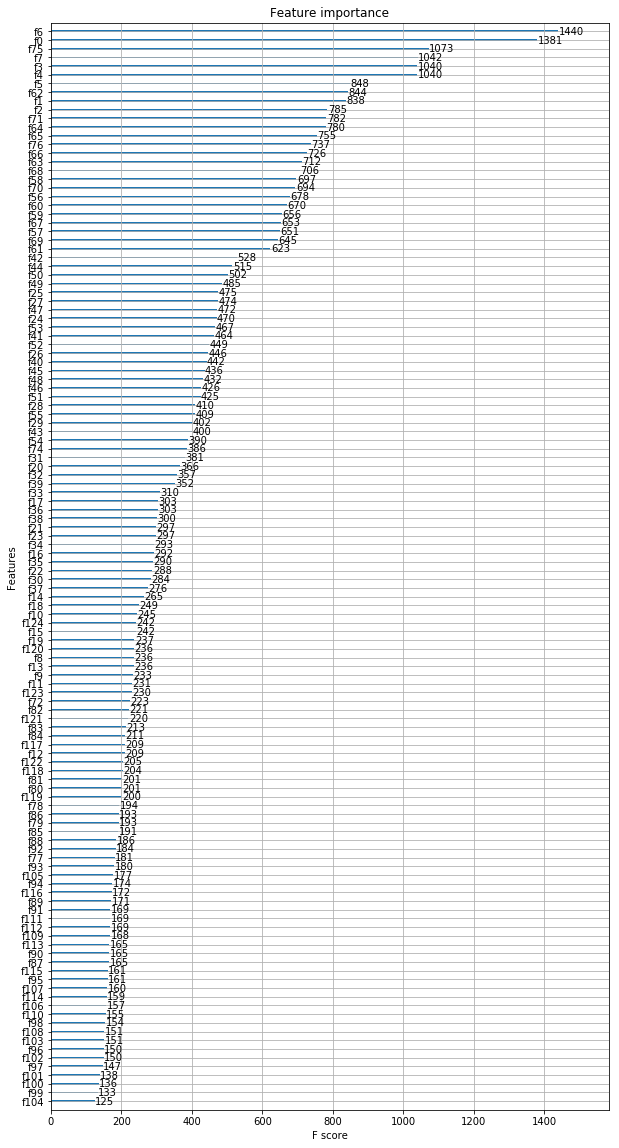

In [32]:
plot_features(model, (10,20))

# NO2

In [24]:
# split the Y_NO2, X into training part and testing part
train_X_NO2, test_X_NO2, train_Y_NO2, test_Y_NO2 = train_test_split(X, Y_NO2, test_size=0.2, random_state=11)
print(train_X_NO2.shape, test_X_NO2.shape, train_Y_NO2.shape, test_Y_NO2.shape)

(202675, 125) (50669, 125) (202675,) (50669,)


In [25]:
#XGBoost
ts = time.time()

model = XGBRegressor(
    max_depth=10,
    learning_rate=0.001,
    n_estimators=1000,
    gamma=0.8,
    min_child_weight=2,
    reg_alpha=0.001,
    max_delta_step=0,
    colsample_bylevel=0.9,
    colsample_bytree=0.8, 
    subsample=0.8,
    base_score=10,
    eta=0.3,    
    seed=1,
    nthread=30)

model.fit(
    train_X_NO2, 
    train_Y_NO2, 
    eval_metric="rmse", 
    eval_set=[(train_X_NO2, train_Y_NO2), (test_X_NO2, test_Y_NO2)], 
    verbose=True, 
    early_stopping_rounds = 10)

pred = model.predict(test_X_NO2)
print (smape(pred, test_Y_NO2))
time.time() - ts

[0]	validation_0-rmse:42.7225	validation_1-rmse:42.3198
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:42.6888	validation_1-rmse:42.2865
[2]	validation_0-rmse:42.6553	validation_1-rmse:42.2532
[3]	validation_0-rmse:42.6212	validation_1-rmse:42.22
[4]	validation_0-rmse:42.5881	validation_1-rmse:42.1866
[5]	validation_0-rmse:42.5543	validation_1-rmse:42.1533
[6]	validation_0-rmse:42.5206	validation_1-rmse:42.1202
[7]	validation_0-rmse:42.4873	validation_1-rmse:42.0868
[8]	validation_0-rmse:42.454	validation_1-rmse:42.0537
[9]	validation_0-rmse:42.4203	validation_1-rmse:42.0208
[10]	validation_0-rmse:42.3872	validation_1-rmse:41.9877
[11]	validation_0-rmse:42.3535	validation_1-rmse:41.9545
[12]	validation_0-rmse:42.3204	validation_1-rmse:41.9215
[13]	validation_0-rmse:42.2872	validation_1-rmse:41.8886
[14]	validation_0-rmse:42.2541	validation_1-rmse:41.8555

[141]	validation_0-rmse:38.3391	validation_1-rmse:37.9814
[142]	validation_0-rmse:38.3105	validation_1-rmse:37.9531
[143]	validation_0-rmse:38.2821	validation_1-rmse:37.925
[144]	validation_0-rmse:38.2538	validation_1-rmse:37.8968
[145]	validation_0-rmse:38.2255	validation_1-rmse:37.8692
[146]	validation_0-rmse:38.1973	validation_1-rmse:37.841
[147]	validation_0-rmse:38.1689	validation_1-rmse:37.8129
[148]	validation_0-rmse:38.1407	validation_1-rmse:37.7851
[149]	validation_0-rmse:38.1124	validation_1-rmse:37.7571
[150]	validation_0-rmse:38.0843	validation_1-rmse:37.7292
[151]	validation_0-rmse:38.056	validation_1-rmse:37.7012
[152]	validation_0-rmse:38.0278	validation_1-rmse:37.6734
[153]	validation_0-rmse:37.9998	validation_1-rmse:37.6454
[154]	validation_0-rmse:37.9717	validation_1-rmse:37.6178
[155]	validation_0-rmse:37.9434	validation_1-rmse:37.5899
[156]	validation_0-rmse:37.915	validation_1-rmse:37.5621
[157]	validation_0-rmse:37.887	validation_1-rmse:37.5346
[158]	validation_0-

[283]	validation_0-rmse:34.6237	validation_1-rmse:34.3129
[284]	validation_0-rmse:34.5996	validation_1-rmse:34.2893
[285]	validation_0-rmse:34.5759	validation_1-rmse:34.2657
[286]	validation_0-rmse:34.5519	validation_1-rmse:34.2421
[287]	validation_0-rmse:34.5281	validation_1-rmse:34.2188
[288]	validation_0-rmse:34.5044	validation_1-rmse:34.1952
[289]	validation_0-rmse:34.4806	validation_1-rmse:34.1717
[290]	validation_0-rmse:34.4568	validation_1-rmse:34.1484
[291]	validation_0-rmse:34.4332	validation_1-rmse:34.125
[292]	validation_0-rmse:34.4095	validation_1-rmse:34.1016
[293]	validation_0-rmse:34.3858	validation_1-rmse:34.0784
[294]	validation_0-rmse:34.3621	validation_1-rmse:34.0552
[295]	validation_0-rmse:34.3385	validation_1-rmse:34.0319
[296]	validation_0-rmse:34.3152	validation_1-rmse:34.0086
[297]	validation_0-rmse:34.2916	validation_1-rmse:33.9856
[298]	validation_0-rmse:34.2682	validation_1-rmse:33.9624
[299]	validation_0-rmse:34.2447	validation_1-rmse:33.9393
[300]	validatio

[425]	validation_0-rmse:31.5183	validation_1-rmse:31.2568
[426]	validation_0-rmse:31.4984	validation_1-rmse:31.2371
[427]	validation_0-rmse:31.4786	validation_1-rmse:31.2176
[428]	validation_0-rmse:31.4588	validation_1-rmse:31.1981
[429]	validation_0-rmse:31.4389	validation_1-rmse:31.1787
[430]	validation_0-rmse:31.4191	validation_1-rmse:31.1593
[431]	validation_0-rmse:31.3995	validation_1-rmse:31.1399
[432]	validation_0-rmse:31.3797	validation_1-rmse:31.1205
[433]	validation_0-rmse:31.3601	validation_1-rmse:31.1012
[434]	validation_0-rmse:31.3404	validation_1-rmse:31.0819
[435]	validation_0-rmse:31.3206	validation_1-rmse:31.0626
[436]	validation_0-rmse:31.3011	validation_1-rmse:31.0433
[437]	validation_0-rmse:31.2816	validation_1-rmse:31.0241
[438]	validation_0-rmse:31.2618	validation_1-rmse:31.005
[439]	validation_0-rmse:31.2423	validation_1-rmse:30.9857
[440]	validation_0-rmse:31.2227	validation_1-rmse:30.9663
[441]	validation_0-rmse:31.2031	validation_1-rmse:30.9472
[442]	validatio

[567]	validation_0-rmse:28.9425	validation_1-rmse:28.7324
[568]	validation_0-rmse:28.9262	validation_1-rmse:28.7164
[569]	validation_0-rmse:28.9098	validation_1-rmse:28.7003
[570]	validation_0-rmse:28.8933	validation_1-rmse:28.6842
[571]	validation_0-rmse:28.877	validation_1-rmse:28.6682
[572]	validation_0-rmse:28.8608	validation_1-rmse:28.6522
[573]	validation_0-rmse:28.8443	validation_1-rmse:28.6361
[574]	validation_0-rmse:28.828	validation_1-rmse:28.6203
[575]	validation_0-rmse:28.8115	validation_1-rmse:28.6043
[576]	validation_0-rmse:28.7954	validation_1-rmse:28.5885
[577]	validation_0-rmse:28.7791	validation_1-rmse:28.5726
[578]	validation_0-rmse:28.763	validation_1-rmse:28.5567
[579]	validation_0-rmse:28.7467	validation_1-rmse:28.5408
[580]	validation_0-rmse:28.7305	validation_1-rmse:28.5249
[581]	validation_0-rmse:28.7142	validation_1-rmse:28.5091
[582]	validation_0-rmse:28.6982	validation_1-rmse:28.4934
[583]	validation_0-rmse:28.682	validation_1-rmse:28.4775
[584]	validation_0

[709]	validation_0-rmse:26.8209	validation_1-rmse:26.6633
[710]	validation_0-rmse:26.8074	validation_1-rmse:26.6501
[711]	validation_0-rmse:26.794	validation_1-rmse:26.637
[712]	validation_0-rmse:26.7805	validation_1-rmse:26.6239
[713]	validation_0-rmse:26.7671	validation_1-rmse:26.6109
[714]	validation_0-rmse:26.7537	validation_1-rmse:26.598
[715]	validation_0-rmse:26.7402	validation_1-rmse:26.585
[716]	validation_0-rmse:26.7268	validation_1-rmse:26.5718
[717]	validation_0-rmse:26.7134	validation_1-rmse:26.5589
[718]	validation_0-rmse:26.7001	validation_1-rmse:26.5459
[719]	validation_0-rmse:26.6868	validation_1-rmse:26.533
[720]	validation_0-rmse:26.6734	validation_1-rmse:26.5201
[721]	validation_0-rmse:26.6602	validation_1-rmse:26.5072
[722]	validation_0-rmse:26.647	validation_1-rmse:26.4943
[723]	validation_0-rmse:26.6339	validation_1-rmse:26.4815
[724]	validation_0-rmse:26.6205	validation_1-rmse:26.4686
[725]	validation_0-rmse:26.6073	validation_1-rmse:26.4556
[726]	validation_0-r

[851]	validation_0-rmse:25.084	validation_1-rmse:24.9801
[852]	validation_0-rmse:25.073	validation_1-rmse:24.9695
[853]	validation_0-rmse:25.062	validation_1-rmse:24.9589
[854]	validation_0-rmse:25.0512	validation_1-rmse:24.9483
[855]	validation_0-rmse:25.0401	validation_1-rmse:24.9376
[856]	validation_0-rmse:25.0293	validation_1-rmse:24.9271
[857]	validation_0-rmse:25.0184	validation_1-rmse:24.9166
[858]	validation_0-rmse:25.0074	validation_1-rmse:24.9059
[859]	validation_0-rmse:24.9965	validation_1-rmse:24.8955
[860]	validation_0-rmse:24.9856	validation_1-rmse:24.885
[861]	validation_0-rmse:24.9746	validation_1-rmse:24.8745
[862]	validation_0-rmse:24.9637	validation_1-rmse:24.864
[863]	validation_0-rmse:24.9528	validation_1-rmse:24.8534
[864]	validation_0-rmse:24.942	validation_1-rmse:24.8431
[865]	validation_0-rmse:24.9312	validation_1-rmse:24.8326
[866]	validation_0-rmse:24.9204	validation_1-rmse:24.8222
[867]	validation_0-rmse:24.9097	validation_1-rmse:24.8119
[868]	validation_0-r

[993]	validation_0-rmse:23.6729	validation_1-rmse:23.6222
[994]	validation_0-rmse:23.6641	validation_1-rmse:23.6136
[995]	validation_0-rmse:23.6551	validation_1-rmse:23.6051
[996]	validation_0-rmse:23.6462	validation_1-rmse:23.5966
[997]	validation_0-rmse:23.6373	validation_1-rmse:23.5881
[998]	validation_0-rmse:23.6283	validation_1-rmse:23.5796
[999]	validation_0-rmse:23.6195	validation_1-rmse:23.5711
0.43245928480353135


3123.5863778591156

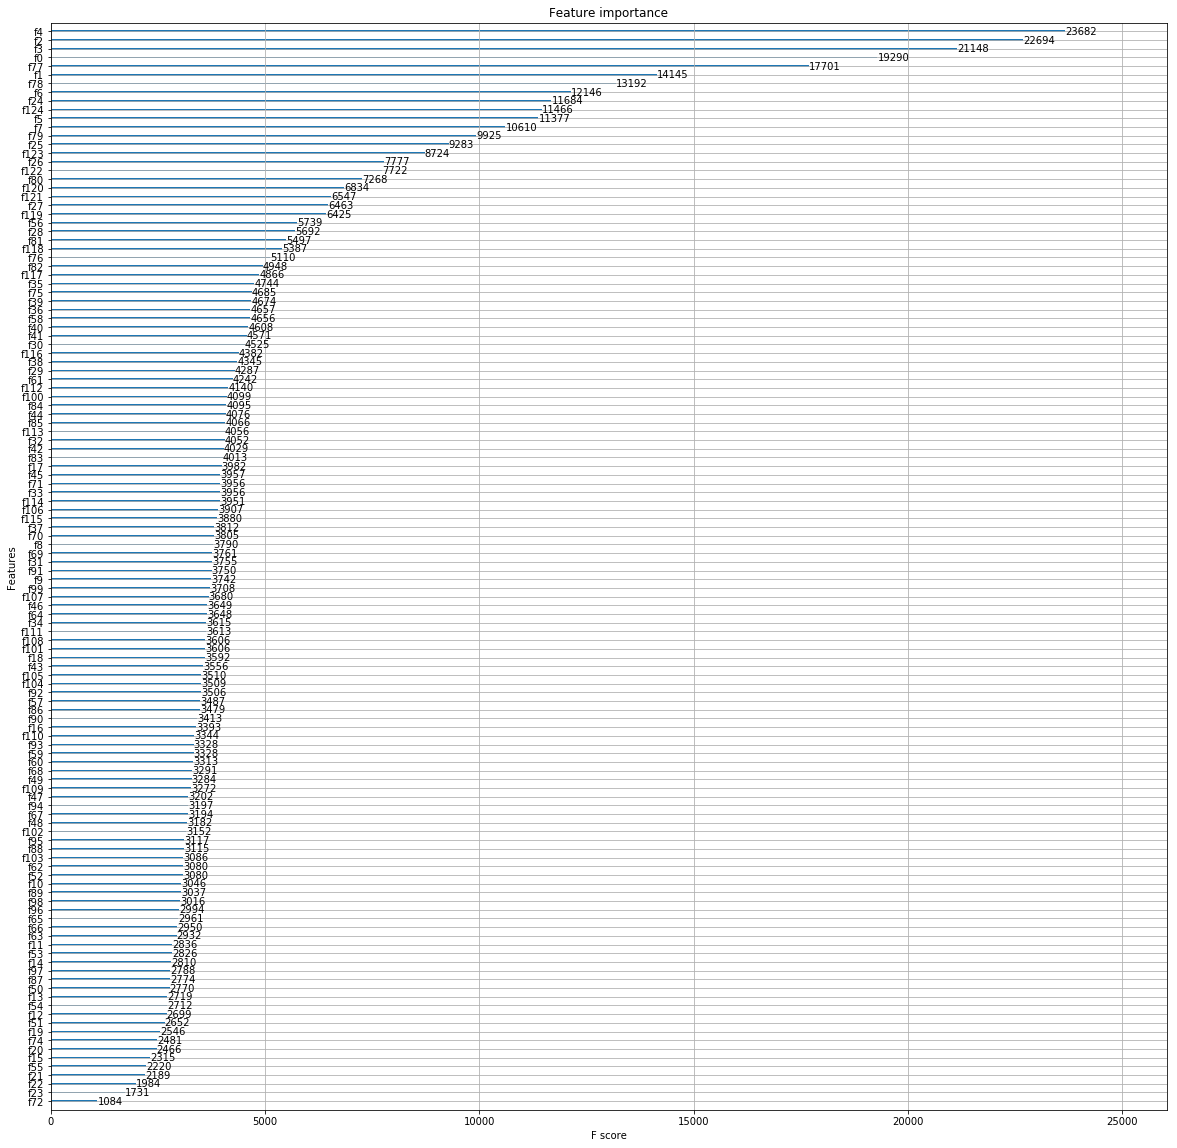

In [26]:
plot_features(model, (20,20))

# PM10

In [16]:
# split the Y_PM10, X into training part and testing part
train_X_PM10, test_X_PM10, train_Y_PM10, test_Y_PM10 = train_test_split(X, Y_PM10, test_size=0.2, random_state=11)
print(train_X_PM10.shape, test_X_PM10.shape, train_Y_PM10.shape, test_Y_PM10.shape)

(202675, 125) (50669, 125) (202675,) (50669,)


In [27]:
#XGBoost
def smape(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) / (y_true + y_pred) * 2)

ts = time.time()

model = XGBRegressor(
    max_depth=10,
    learning_rate=0.001,
    n_estimators=1000,
    gamma=0.8,
    min_child_weight=2,
    reg_alpha=0.001,
    max_delta_step=0,
    colsample_bylevel=0.9,
    colsample_bytree=0.8, 
    subsample=0.8,
    base_score=10,
    eta=0.3,    
    seed=1,
    nthread=30)

model.fit(
    train_X_PM10, 
    train_Y_PM10, 
    #eval_metric="smape", 
    eval_set=[(train_X_PM10, train_Y_PM10), (test_X_PM10, test_Y_PM10)], 
    verbose=True, 
    early_stopping_rounds = 10)

pred = model.predict(test_X_PM10)
print (smape(pred, test_Y_PM10))
time.time() - ts

[0]	validation_0-rmse:16.087	validation_1-rmse:16.057
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:16.0759	validation_1-rmse:16.0455
[2]	validation_0-rmse:16.0646	validation_1-rmse:16.0342
[3]	validation_0-rmse:16.053	validation_1-rmse:16.0229
[4]	validation_0-rmse:16.0413	validation_1-rmse:16.0116
[5]	validation_0-rmse:16.0297	validation_1-rmse:16.0004
[6]	validation_0-rmse:16.0186	validation_1-rmse:15.9892
[7]	validation_0-rmse:16.0072	validation_1-rmse:15.9779
[8]	validation_0-rmse:15.9961	validation_1-rmse:15.9668
[9]	validation_0-rmse:15.9849	validation_1-rmse:15.9556
[10]	validation_0-rmse:15.9736	validation_1-rmse:15.9444
[11]	validation_0-rmse:15.9623	validation_1-rmse:15.9332
[12]	validation_0-rmse:15.9509	validation_1-rmse:15.9221
[13]	validation_0-rmse:15.9397	validation_1-rmse:15.9109
[14]	validation_0-rmse:15.9286	validation_1-rmse:15.8999

[141]	validation_0-rmse:14.6113	validation_1-rmse:14.5997
[142]	validation_0-rmse:14.6018	validation_1-rmse:14.5903
[143]	validation_0-rmse:14.5923	validation_1-rmse:14.5809
[144]	validation_0-rmse:14.5828	validation_1-rmse:14.5715
[145]	validation_0-rmse:14.5733	validation_1-rmse:14.5622
[146]	validation_0-rmse:14.5637	validation_1-rmse:14.5528
[147]	validation_0-rmse:14.5542	validation_1-rmse:14.5434
[148]	validation_0-rmse:14.5447	validation_1-rmse:14.5341
[149]	validation_0-rmse:14.5353	validation_1-rmse:14.5247
[150]	validation_0-rmse:14.5258	validation_1-rmse:14.5155
[151]	validation_0-rmse:14.5163	validation_1-rmse:14.5062
[152]	validation_0-rmse:14.5069	validation_1-rmse:14.4969
[153]	validation_0-rmse:14.4975	validation_1-rmse:14.4877
[154]	validation_0-rmse:14.4882	validation_1-rmse:14.4784
[155]	validation_0-rmse:14.4788	validation_1-rmse:14.4691
[156]	validation_0-rmse:14.4694	validation_1-rmse:14.4598
[157]	validation_0-rmse:14.4599	validation_1-rmse:14.4506
[158]	validati

[283]	validation_0-rmse:13.374	validation_1-rmse:13.3822
[284]	validation_0-rmse:13.3661	validation_1-rmse:13.3745
[285]	validation_0-rmse:13.3581	validation_1-rmse:13.3667
[286]	validation_0-rmse:13.3503	validation_1-rmse:13.3589
[287]	validation_0-rmse:13.3425	validation_1-rmse:13.3512
[288]	validation_0-rmse:13.3346	validation_1-rmse:13.3435
[289]	validation_0-rmse:13.3267	validation_1-rmse:13.3358
[290]	validation_0-rmse:13.319	validation_1-rmse:13.3282
[291]	validation_0-rmse:13.3112	validation_1-rmse:13.3204
[292]	validation_0-rmse:13.3034	validation_1-rmse:13.3127
[293]	validation_0-rmse:13.2955	validation_1-rmse:13.3051
[294]	validation_0-rmse:13.2878	validation_1-rmse:13.2974
[295]	validation_0-rmse:13.28	validation_1-rmse:13.2897
[296]	validation_0-rmse:13.2721	validation_1-rmse:13.282
[297]	validation_0-rmse:13.2644	validation_1-rmse:13.2745
[298]	validation_0-rmse:13.2567	validation_1-rmse:13.2669
[299]	validation_0-rmse:13.249	validation_1-rmse:13.2592
[300]	validation_0-r

[425]	validation_0-rmse:12.3527	validation_1-rmse:12.3808
[426]	validation_0-rmse:12.3461	validation_1-rmse:12.3744
[427]	validation_0-rmse:12.3397	validation_1-rmse:12.3681
[428]	validation_0-rmse:12.3332	validation_1-rmse:12.3617
[429]	validation_0-rmse:12.3267	validation_1-rmse:12.3554
[430]	validation_0-rmse:12.3202	validation_1-rmse:12.3491
[431]	validation_0-rmse:12.3137	validation_1-rmse:12.3428
[432]	validation_0-rmse:12.3073	validation_1-rmse:12.3365
[433]	validation_0-rmse:12.3009	validation_1-rmse:12.3302
[434]	validation_0-rmse:12.2944	validation_1-rmse:12.3239
[435]	validation_0-rmse:12.288	validation_1-rmse:12.3176
[436]	validation_0-rmse:12.2816	validation_1-rmse:12.3113
[437]	validation_0-rmse:12.2752	validation_1-rmse:12.3051
[438]	validation_0-rmse:12.2688	validation_1-rmse:12.2988
[439]	validation_0-rmse:12.2624	validation_1-rmse:12.2926
[440]	validation_0-rmse:12.256	validation_1-rmse:12.2863
[441]	validation_0-rmse:12.2496	validation_1-rmse:12.2801
[442]	validation

[567]	validation_0-rmse:11.5148	validation_1-rmse:11.5639
[568]	validation_0-rmse:11.5095	validation_1-rmse:11.5587
[569]	validation_0-rmse:11.5042	validation_1-rmse:11.5536
[570]	validation_0-rmse:11.4989	validation_1-rmse:11.5484
[571]	validation_0-rmse:11.4936	validation_1-rmse:11.5432
[572]	validation_0-rmse:11.4883	validation_1-rmse:11.5381
[573]	validation_0-rmse:11.483	validation_1-rmse:11.5329
[574]	validation_0-rmse:11.4777	validation_1-rmse:11.5278
[575]	validation_0-rmse:11.4724	validation_1-rmse:11.5227
[576]	validation_0-rmse:11.4672	validation_1-rmse:11.5176
[577]	validation_0-rmse:11.4619	validation_1-rmse:11.5126
[578]	validation_0-rmse:11.4568	validation_1-rmse:11.5075
[579]	validation_0-rmse:11.4515	validation_1-rmse:11.5024
[580]	validation_0-rmse:11.4463	validation_1-rmse:11.4973
[581]	validation_0-rmse:11.4411	validation_1-rmse:11.4923
[582]	validation_0-rmse:11.4358	validation_1-rmse:11.4872
[583]	validation_0-rmse:11.4306	validation_1-rmse:11.4822
[584]	validatio

[709]	validation_0-rmse:10.8314	validation_1-rmse:10.9016
[710]	validation_0-rmse:10.8271	validation_1-rmse:10.8975
[711]	validation_0-rmse:10.8228	validation_1-rmse:10.8934
[712]	validation_0-rmse:10.8186	validation_1-rmse:10.8892
[713]	validation_0-rmse:10.8142	validation_1-rmse:10.885
[714]	validation_0-rmse:10.8099	validation_1-rmse:10.8808
[715]	validation_0-rmse:10.8056	validation_1-rmse:10.8767
[716]	validation_0-rmse:10.8014	validation_1-rmse:10.8726
[717]	validation_0-rmse:10.797	validation_1-rmse:10.8684
[718]	validation_0-rmse:10.7928	validation_1-rmse:10.8644
[719]	validation_0-rmse:10.7885	validation_1-rmse:10.8602
[720]	validation_0-rmse:10.7842	validation_1-rmse:10.8561
[721]	validation_0-rmse:10.78	validation_1-rmse:10.8519
[722]	validation_0-rmse:10.7758	validation_1-rmse:10.8478
[723]	validation_0-rmse:10.7716	validation_1-rmse:10.8437
[724]	validation_0-rmse:10.7674	validation_1-rmse:10.8397
[725]	validation_0-rmse:10.763	validation_1-rmse:10.8355
[726]	validation_0-

[851]	validation_0-rmse:10.2772	validation_1-rmse:10.3682
[852]	validation_0-rmse:10.2737	validation_1-rmse:10.3648
[853]	validation_0-rmse:10.2701	validation_1-rmse:10.3615
[854]	validation_0-rmse:10.2666	validation_1-rmse:10.3582
[855]	validation_0-rmse:10.2631	validation_1-rmse:10.3548
[856]	validation_0-rmse:10.2596	validation_1-rmse:10.3515
[857]	validation_0-rmse:10.2561	validation_1-rmse:10.3482
[858]	validation_0-rmse:10.2526	validation_1-rmse:10.3448
[859]	validation_0-rmse:10.2491	validation_1-rmse:10.3415
[860]	validation_0-rmse:10.2457	validation_1-rmse:10.3381
[861]	validation_0-rmse:10.2422	validation_1-rmse:10.3348
[862]	validation_0-rmse:10.2387	validation_1-rmse:10.3315
[863]	validation_0-rmse:10.2352	validation_1-rmse:10.3282
[864]	validation_0-rmse:10.2318	validation_1-rmse:10.325
[865]	validation_0-rmse:10.2284	validation_1-rmse:10.3216
[866]	validation_0-rmse:10.225	validation_1-rmse:10.3183
[867]	validation_0-rmse:10.2216	validation_1-rmse:10.3151
[868]	validation

[993]	validation_0-rmse:9.8289	validation_1-rmse:9.94039
[994]	validation_0-rmse:9.82607	validation_1-rmse:9.93775
[995]	validation_0-rmse:9.82324	validation_1-rmse:9.93505
[996]	validation_0-rmse:9.8204	validation_1-rmse:9.93236
[997]	validation_0-rmse:9.81759	validation_1-rmse:9.92967
[998]	validation_0-rmse:9.81476	validation_1-rmse:9.92702
[999]	validation_0-rmse:9.81197	validation_1-rmse:9.92437
0.35162794988430246


2951.7260370254517

/Users/yulynn/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/yulynn/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


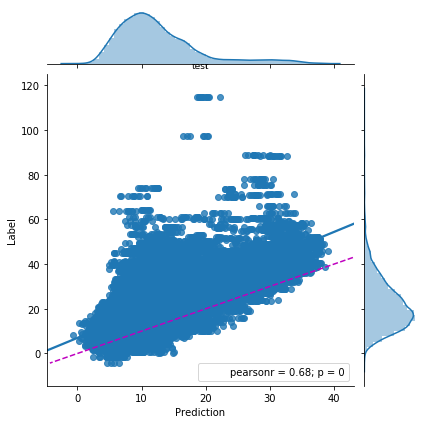

In [66]:
pred = model.predict(test_X_PM10)
model_performance_sc_plot(pred, test_Y_PM10, 'test')

In [36]:
test_Y_PM10

array([32.6, 36.8, 52.9, ..., 22.1, 19.9, 27.4])

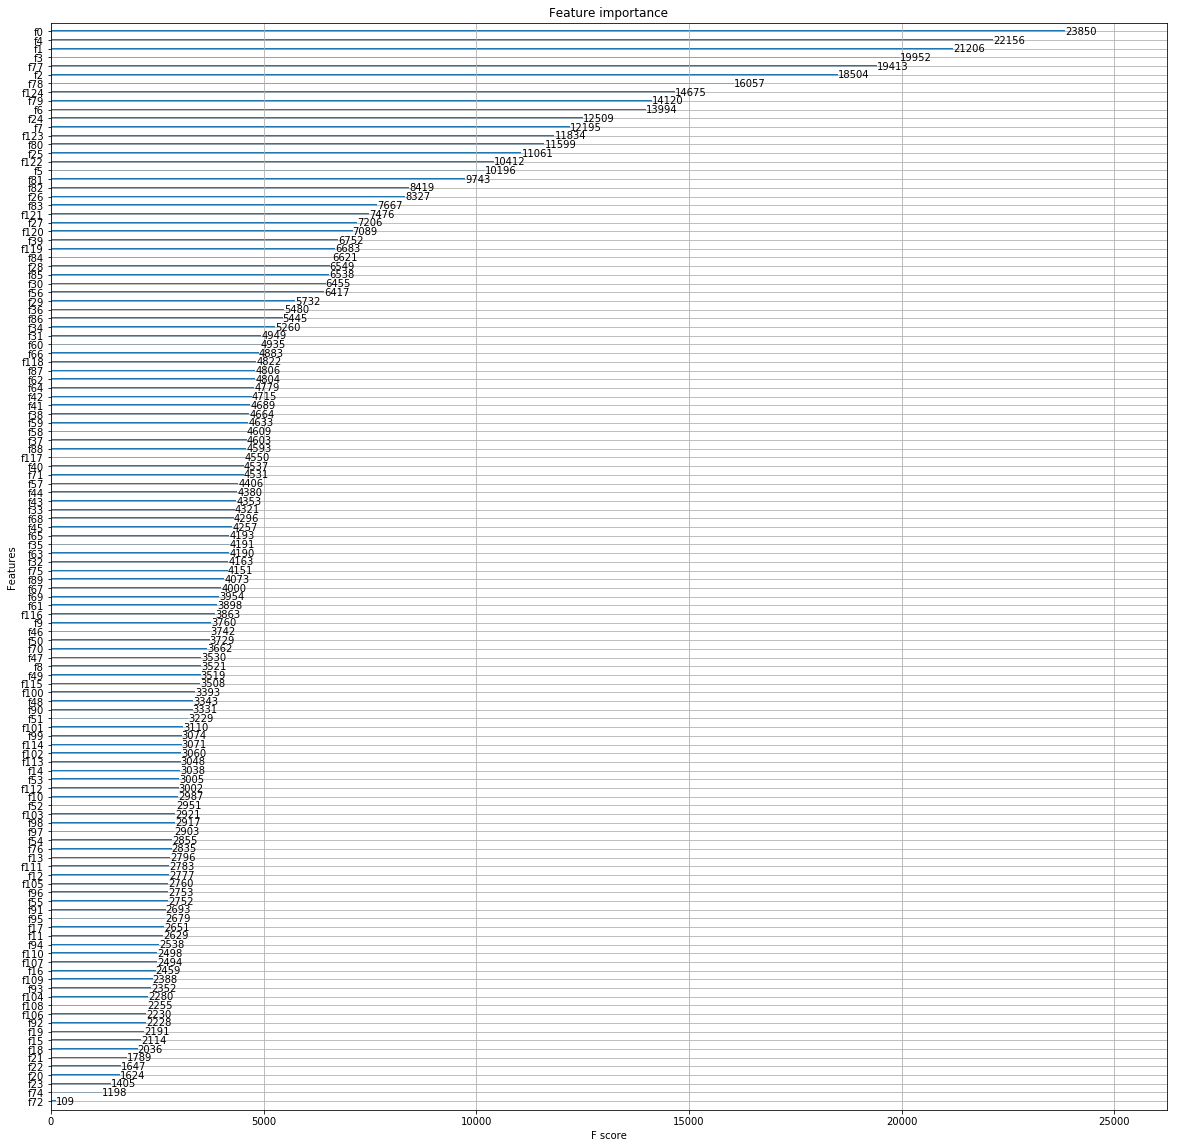

In [28]:
plot_features(model, (20,20))

# grid search for pm25

In [5]:
#grid search 
params = {
    # 'objective': reg:linear,
    'max_depth': 5,
    # 'learning_rate':0.001,
    'learning_rate': 0.001,
    'n_estimators': 2000,
    'gamma': 0.0,
    'min_child_weight': 2,
    'max_delta_step': 0,
    'subsample': 0.9,
    'colsample_bytree': 0.6,
    'colsample_bylevel': 0.9,
    'base_score': 10,
    'seed': 1
}

'''
'max_depth': 10,
'learning_rate': 0.001,
# 'learning_rate': 0.02,
'n_estimators': 3000,
'gamma': 0.8,
'min_child_weight': 2,
'reg_alpha': 0.001,
'max_delta_step': 0,
'subsample': 0.8,
'colsample_bytree': 0.8,
'colsample_bylevel': 0.9,
'base_score': 10,
'seed': 1,
'nthread': 10
'''

param_test1 = {
    'max_depth': range(7, 12, 2),
    'min_child_weight': [2],
    'gamma': [i / 10.0 for i in range(8, 9)],
    'subsample': [i / 10.0 for i in range(6, 10)],
    'colsample_bytree': [i / 10.0 for i in range(6, 10)],
    'reg_alpha': [0, 0.001, 0.001],
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [1000, 2000, 3000]
}

param_test3 = {
    'gamma': [i / 10.0 for i in range(0, 10)]
}

param_test4 = {
    'subsample': [i / 10.0 for i in range(6, 10)],
    'colsample_bytree': [i / 10.0 for i in range(6, 10)]
}

param_test6 = {
    'reg_alpha': [1e-5, 1e-2, 0.1, 1, 100]
}

param_test7 = {
    'reg_alpha': [0, 0.001, 0.005, 0.01, 0.05]
}

param_test8 = {
    'learning_rate': [0.001, 0.002, 0.005, 0.01, 0.1],
    'n_estimators': [2000, 3000, 4000],
}

In [14]:
cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=2)
estimator=xgb.XGBRegressor(
    learning_rate=0.001,
    n_estimators=3000,
    max_depth=10,
    min_child_weight=2,
    reg_alpha=0.001,
    gamma=0.6,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=1,
    seed=27)
gsearch1 = GridSearchCV(estimator, param_grid=param_test8, scoring=scoring, n_jobs=-1, cv=cv, verbose=6)
print (1)



1


In [15]:
gsearch1.fit(train_X_PM25, train_Y_PM25)
print (gsearch1.grid_scores_, gsearch1.best_score_)
print (gsearch1.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] learning_rate=0.001, n_estimators=2000 ..........................
[CV] learning_rate=0.001, n_estimators=2000 ..........................
[CV] learning_rate=0.001, n_estimators=2000 ..........................
[CV] learning_rate=0.001, n_estimators=2000 ..........................
[CV]  learning_rate=0.001, n_estimators=2000, score=0.35369033968439795, total=156.8min
[CV] learning_rate=0.001, n_estimators=2000 ..........................
[CV]  learning_rate=0.001, n_estimators=2000, score=0.3523677177737484, total=158.0min
[CV] learning_rate=0.001, n_estimators=3000 ..........................
[CV]  learning_rate=0.001, n_estimators=2000, score=0.3523016191614091, total=158.0min
[CV] learning_rate=0.001, n_estimators=3000 ..........................
[CV]  learning_rate=0.001, n_estimators=2000, score=0.3488942414858317, total=158.0min
[CV] learning_rate=0.001, n_estimators=3000 ..........................
[CV]  learning_rate=0.

[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 317.6min


[CV]  learning_rate=0.001, n_estimators=3000, score=0.3308570863782389, total=232.1min
[CV] learning_rate=0.001, n_estimators=3000 ..........................
[CV]  learning_rate=0.001, n_estimators=3000, score=0.32672268874636323, total=234.2min
[CV] learning_rate=0.001, n_estimators=4000 ..........................
[CV]  learning_rate=0.001, n_estimators=3000, score=0.33234995780260973, total=234.6min
[CV] learning_rate=0.001, n_estimators=4000 ..........................
[CV]  learning_rate=0.001, n_estimators=3000, score=0.3302751440564483, total=233.7min
[CV] learning_rate=0.001, n_estimators=4000 ..........................


KeyboardInterrupt: 

In [ ]:
    '''   
    best_params1 = {
            'max_depth': 10,
            'learning_rate': 0.001,
            'n_estimators': 3000,
            'gamma': 0.8,
            'min_child_weight': 2,
            'reg_alpha': 0.001,
            'max_delta_step': 0,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'colsample_bylevel': 0.9,
            'base_score': 10,
            'seed': 1,
            'nthread': 30
        }
    '''